In [1]:
from settings import *

random_rho0s: setting seed=21284


In [2]:
qubits = TriangularLayoutA(m=1, cutoff=1, distance=0.9)
operations = [("rz", "A"), ("rx", "A"), ("rz", "A"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

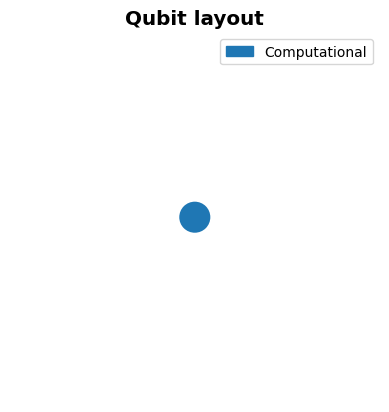

In [3]:
qubits.show_layout()

In [4]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, n_grad=10, max_count=100)

theta_opt = np.save("ham_theta_opt.npy", theta_opt)
thetas = np.save("ham_thetas.npy", thetas)
errors = np.save("ham_errors.npy", errors)

optimizer (optimization indices): setting seed=17799
Iteration: 0 
            Max gradient term: 0.08715939629228009 
            Current gradient: [ 0.          0.          0.          0.          0.06127648  0.
  0.          0.          0.          0.          0.          0.
  0.          0.0871594   0.          0.          0.06959168 -0.05627406
  0.          0.          0.          0.          0.0163715   0.
  0.          0.          0.07766856  0.          0.07766856  0.
  0.          0.          0.          0.          0.          0.
  0.          0.06557902  0.          0.        ] 
            Current error: 0.32942996147936826 
            Current sigma values: (0, 1, 10)


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 10 
            Max gradient term: 0.0003033393713274059 
            Current gradient: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.20348129e-05  1.01802521e-04  0.00000000e+00
  1.01802521e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.18728445e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.10190426e-04  0.00000000e+00  3.03339371e-04  0.00000000e+00
  3.03339371e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00] 
            Current error: 2.490808582796165e-07 
            Current sigma values: (2, 0, 5.0)
Error reduced below threshold of 1e-10 after 18 iterations


In [5]:
theta_opt = np.load("ham_theta_opt.npy")
thetas = np.load("ham_thetas.npy")
errors = np.load("ham_errors.npy")

In [6]:
theta_opt

array([ 1.05802735,  0.85236039,  1.00000527,  1.        ,  0.34914967,
        1.04623308,  1.2137306 ,  1.        ,  1.20320764,  1.00001014,
        0.59267028,  1.        ,  0.64330027, -0.00939781,  0.99687914,
        1.        ,  0.33619323,  1.89156427,  1.07376942,  1.        ,
        1.11947775,  1.52631473,  0.81004439,  1.        ,  0.22766008,
        1.05984661,  0.25519674,  1.        ,  0.27672925,  0.97810503,
        2.03779767,  1.        ,  0.94725739,  0.91827537,  1.01300113,
        1.        ,  0.60302665,  0.3269031 ,  1.43302827,  1.        ])

In [7]:
from q_channel_approx.unitary_circuits import unitary_circuit_fac

In [8]:
ham = unitary_circuit_fac(qubits, operations, repeats=1, depth=1)(theta_opt)
import qutip as qt
qt.Qobj(ham)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.46953672-0.78015336j -0.41322175-0.01199136j]
 [ 0.41322175-0.01199136j  0.46953672+0.78015336j]]

In [9]:
ham.dot(ham.conj().T) # check if unitary

array([[1.00000000e+00+0.j, 1.11442221e-17+0.j],
       [1.11442221e-17+0.j, 1.00000000e+00+0.j]])

In [10]:
ham

array([[ 0.46953672-0.78015336j, -0.41322175-0.01199136j],
       [ 0.41322175-0.01199136j,  0.46953672+0.78015336j]])

In [11]:
from q_channel_approx.physics_defns import create_hamiltonian
h = create_hamiltonian(system).full()
import scipy as sc
sc.linalg.expm((-1j) * 0.1 * h)

array([[0.99920011+0.j        , 0.        -0.03998933j],
       [0.        -0.03998933j, 0.99920011+0.j        ]])

rho_rand_haar: seed=68159


c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

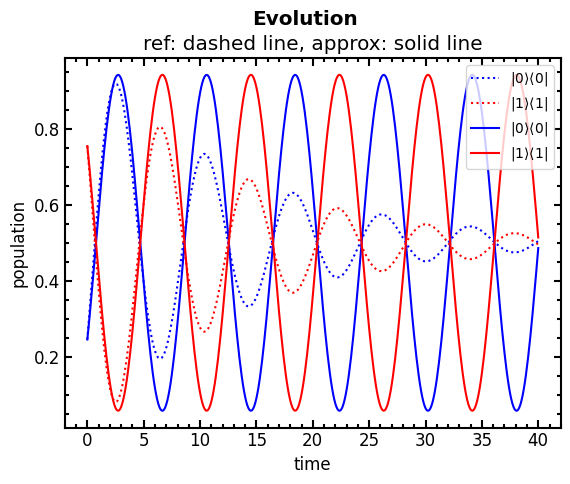

In [12]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(400, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.1, N=400, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

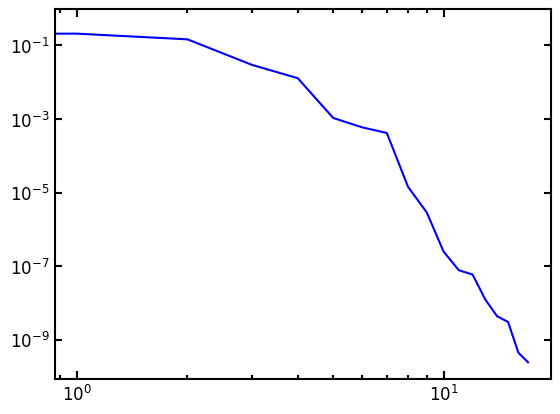

In [13]:
plt.loglog(errors)